In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

train.shape, test.shape, submission.shape

((1460, 81), (1459, 80), (1459, 2))

In [4]:
train_ID = train['Id']
test_ID = test ['Id']
train_result=train['SalePrice']
train_data=train.drop(["Id"],axis=1)
test_data=test.drop(["Id"],axis=1)

train_data.shape, train_result.shape, test_data.shape

((1460, 80), (1460,), (1459, 79))

### Data Clearning

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Util

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.isnull().any().any()

True

In [9]:
train.duplicated().sum()

0

In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### distribution of SalePrice

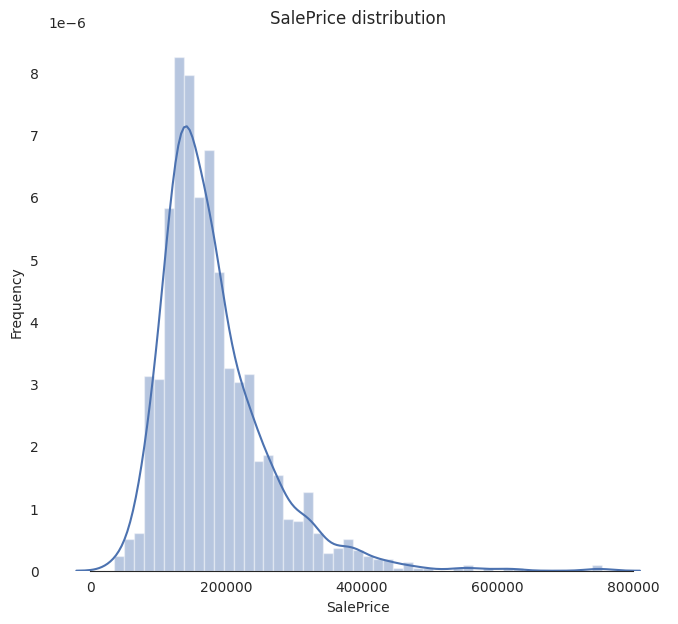

In [11]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# Check the new distribution 
sns.distplot(train_data['SalePrice'], color="b", kde=True)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [12]:
# log price
# log(1+x) to all elements of the column SalePrice
logPrice = np.log1p(train_data['SalePrice']) 

train_data_log = train_data.copy()
train_data_log['logPrice'] = logPrice

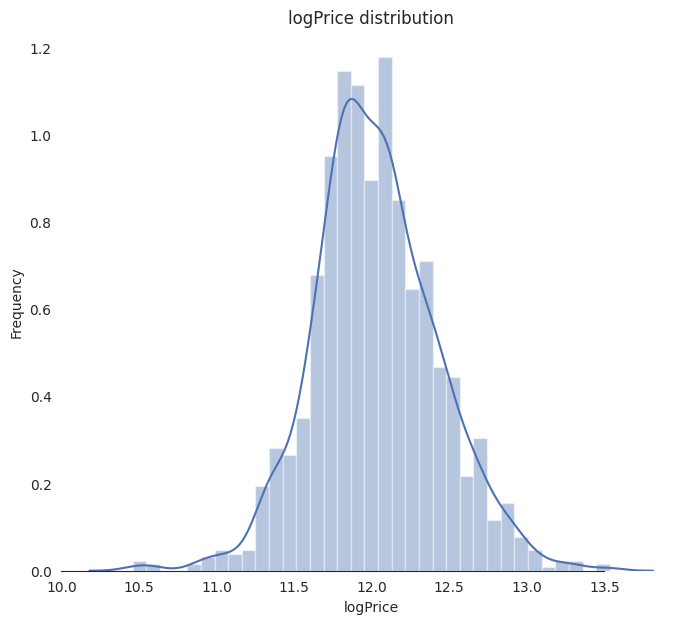

In [13]:
# adjust skewness
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# Check the new distribution 
sns.distplot(train_data_log['logPrice'], color="b", kde=True)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="logPrice")
ax.set(title="logPrice distribution")
sns.despine(trim=True, left=True)
plt.show()
#################################### normal distribution line

In [14]:
# Missing values for train data & test data 
train_features = train_data.drop(["SalePrice"],axis=1)
combined_data = pd.concat([train_features, test_data], axis=0, ignore_index=True)

missing_values = combined_data.isna().sum()
missing_columns = (missing_values[missing_values > 0] / len(combined_data)) * 100
print(missing_columns.sort_values(ascending=False))

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
FireplaceQu     48.646797
LotFrontage     16.649538
GarageQual       5.447071
GarageYrBlt      5.447071
GarageCond       5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
Functional       0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
Electrical       0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
KitchenQual      0.034258
GarageArea       0.034258
GarageCars       0.034258
SaleType         0.034258
dtype: float64


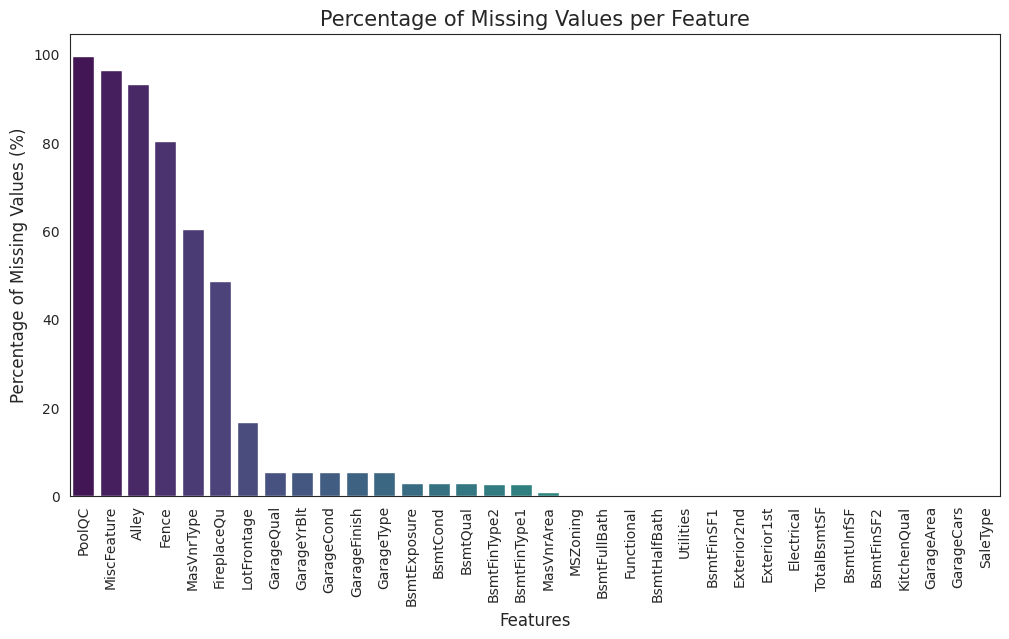

We can remove features with missing values that are more than 10%.


In [15]:
# only choose features that missing percentage > 0
missing_columns = missing_columns.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_columns.index, y=missing_columns.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.title('Percentage of Missing Values per Feature', fontsize=15)
plt.show()
print('We can remove features with missing values that are more than 10%.')

In [16]:
missing_columns_list = ['GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageType',
                   'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1',
                   'MasVnrArea','MSZoning','BsmtFullBath','Functional','Utilities','GarageArea',
                   'GarageCars','Electrical','KitchenQual','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2',
                   'BsmtFinSF1','Exterior2nd','Exterior1st','SaleType']

# functional - typical
# features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = [] # numeric features
categoric = [] # category features
for i in train.columns:
    # delete features with higher missing percentage(>10%)
    if i in ['PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage']:
        pass
    else:
        # seperate numeric feature & categorical features 
        if train[i].dtype in numeric_dtypes:
            numeric.append(i) 
            
        else:
            categoric.append(i)

# numeric, categoric

### detect outlier

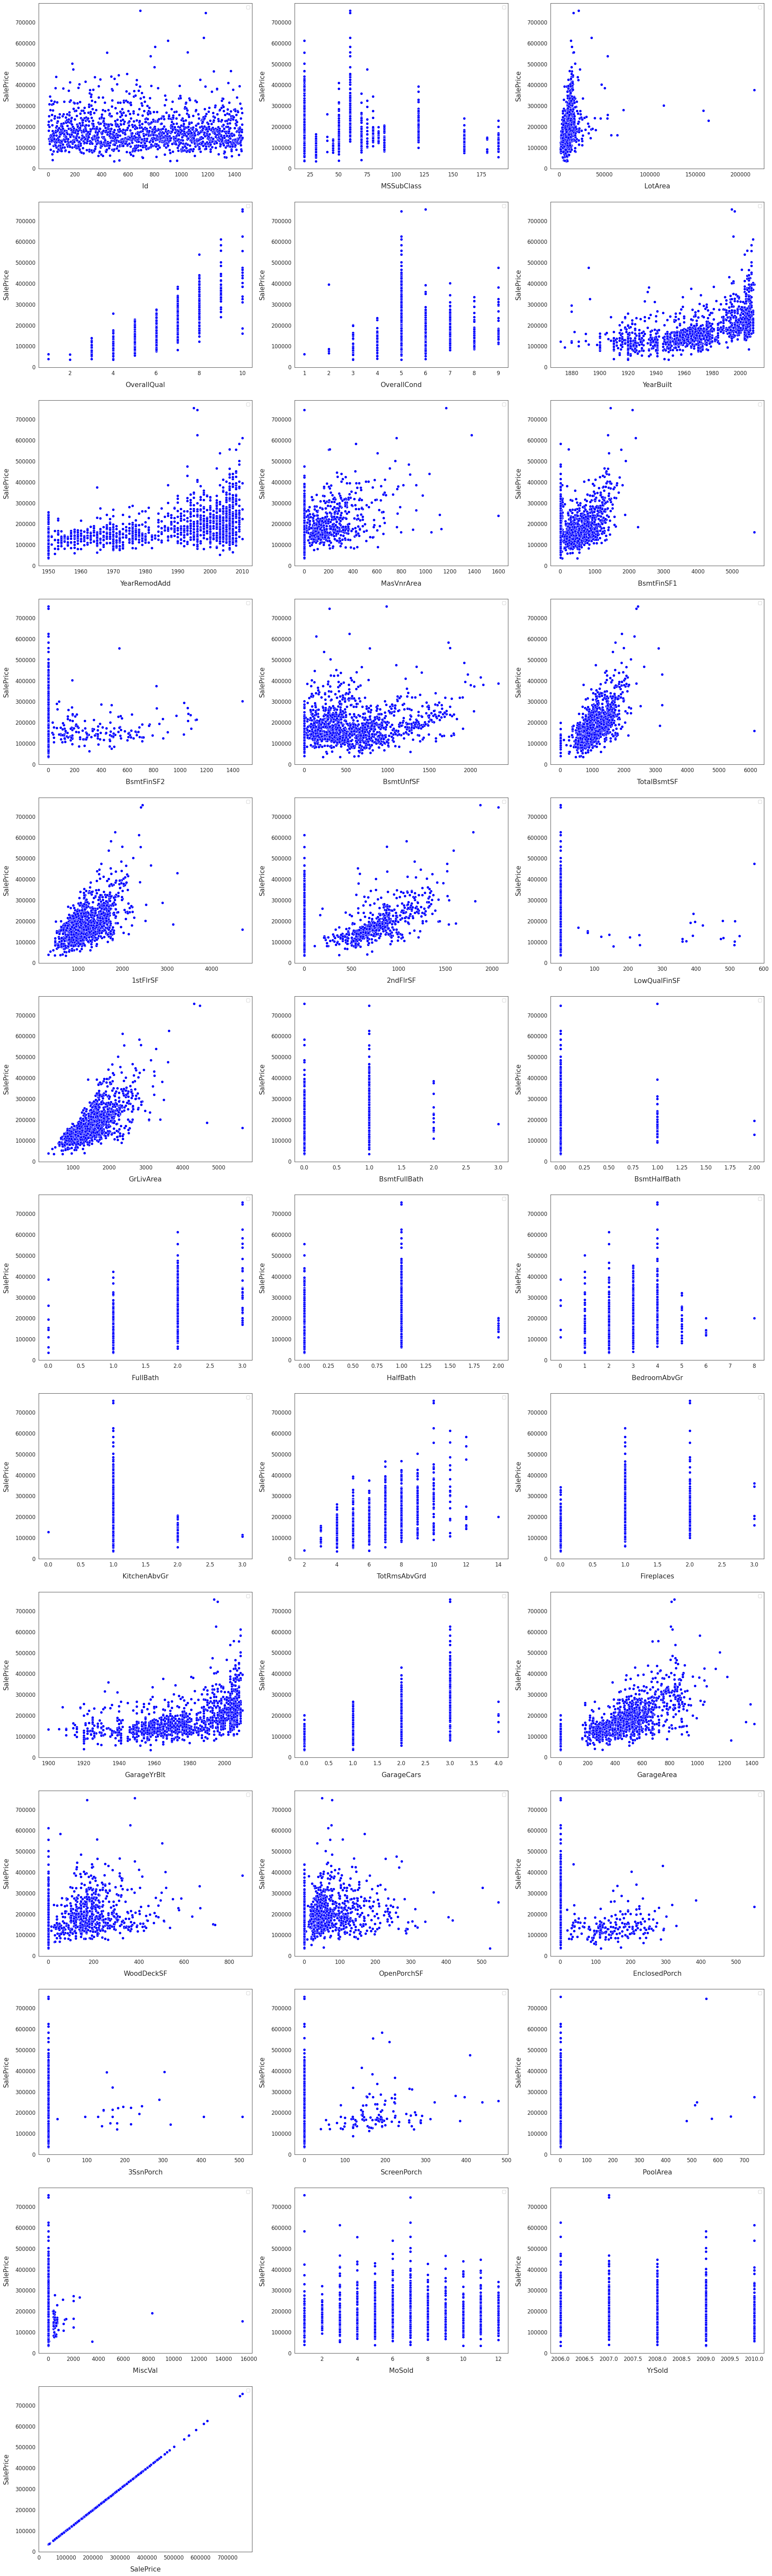

In [17]:
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[numeric]), 1):
    # if(feature=='MiscVal'):
        # break
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', color='blue', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

### Heat Map

<Axes: >

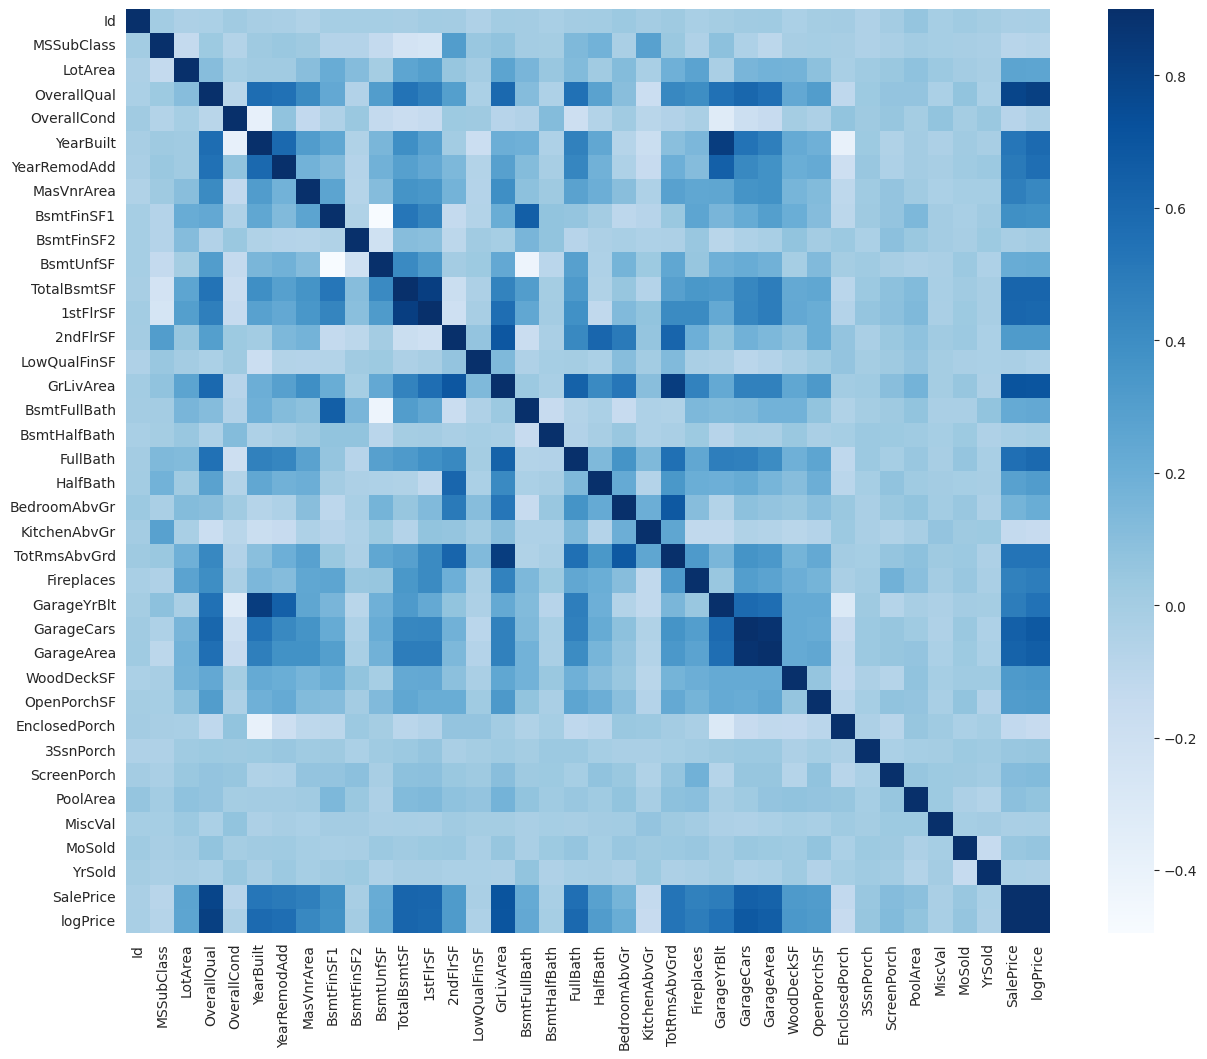

In [18]:
train_numeric_data = train[numeric]
train_numeric_data_log = train_numeric_data.copy()
train_numeric_data_log["logPrice"] = train_data_log['logPrice']
corr = train_numeric_data_log.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

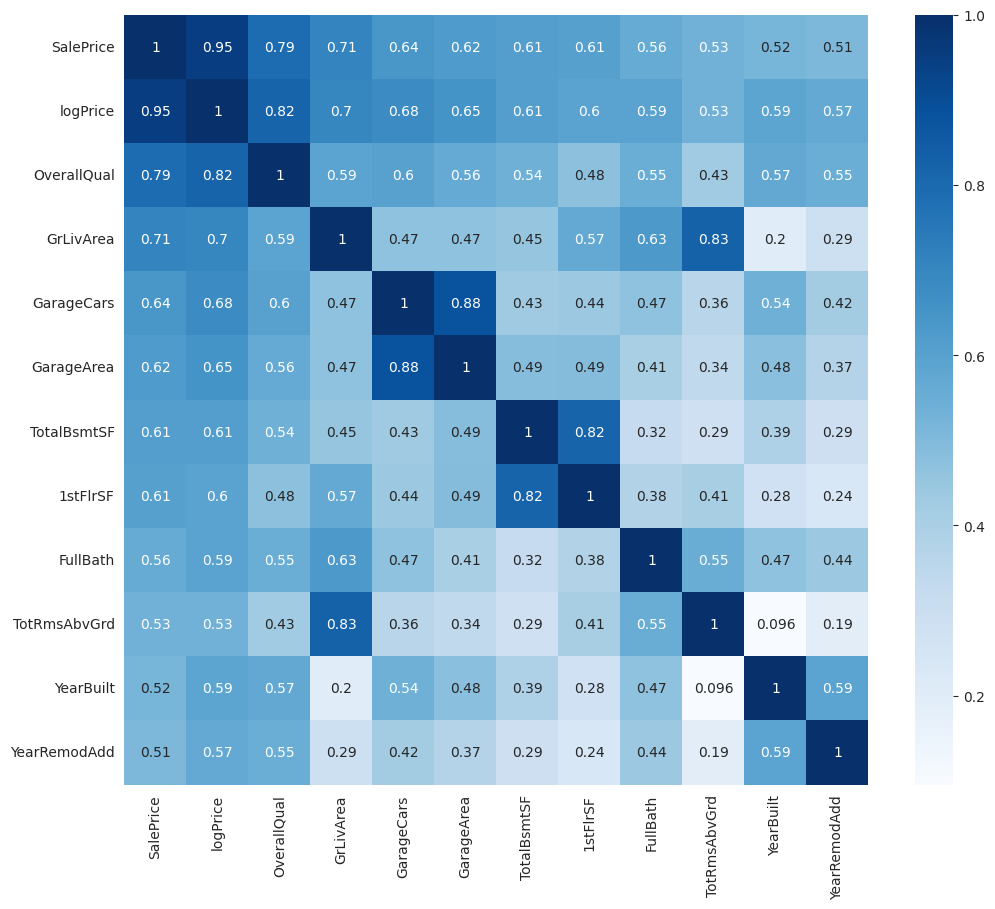

In [19]:
corr_matrix = train_numeric_data_log.corr()

target_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(12).index
top_corr_matrix = train_numeric_data_log[top_10_features].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Blues')
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

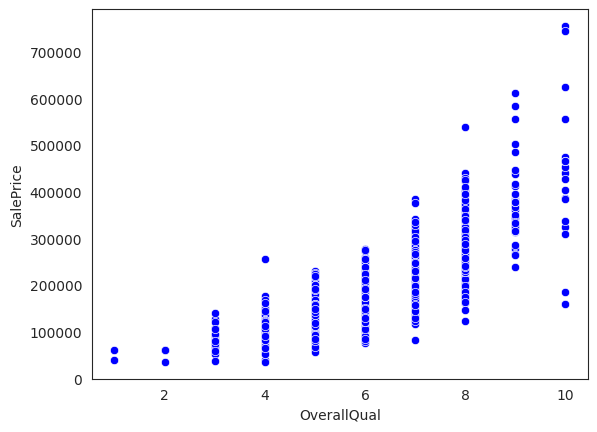

In [20]:
sns.scatterplot(x='OverallQual', y='SalePrice', color='blue', data=train)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

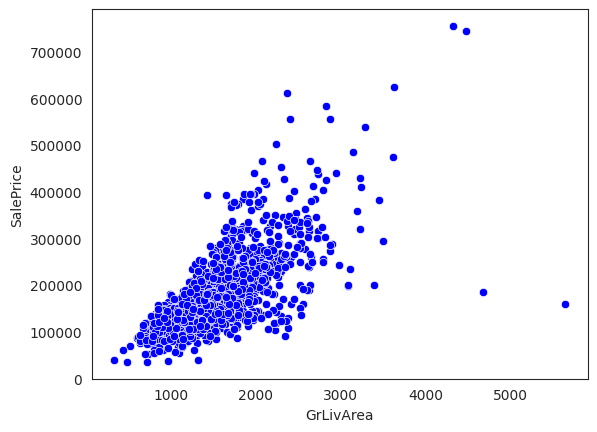

In [21]:
sns.scatterplot(x='GrLivArea', y='SalePrice', color='blue', data=train)

# Feature Engineering

### Remove outliers

In [22]:
train_data.drop(train_data[(train_data['OverallQual']<5) & (train_data['SalePrice']>200000)].index, inplace=True)
train_data.drop(train_data[(train_data['GrLivArea']>4500) & (train_data['SalePrice']<300000)].index, inplace=True)
train_data.reset_index(drop=True, inplace=True)
train_data.shape

(1457, 80)

### handle missing values

In [23]:
# def handle_missing(features):    
missing_columns_list = ['GarageFinish','GarageQual','GarageCond','GarageYrBlt','GarageType',  
                        'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType2','BsmtFinType1', 
                        'MasVnrArea','MSZoning',
                        'Functional',
                        'Utilities',
                        'GarageArea', 'GarageCars',
                        'Electrical',
                        'KitchenQual',
                        'TotalBsmtSF','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1','BsmtFullBath',
                        'Exterior2nd','Exterior1st',
                        'SaleType']

# Drop features which missing values > 10%
train_result = train_data['SalePrice']
print(train_result.shape)
train_features = train_data.drop(['SalePrice'], axis=1)
test_features = test_data

features = pd.concat([train_features, test_features]).reset_index(drop=True)

# features = train_data.drop(['PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'], axis=1)
    
# Delete false values
s=0
for i in range(len(features)):
    if not all([features['BsmtQual'].isnull()[i], features['BsmtExposure'].isnull()[i], features['BsmtFinType1'].isnull()[i], features['BsmtFinType2'].isnull()[i], features['BsmtCond'].isnull()[i]]) and not all(not v for v in [features['BsmtQual'].isnull()[i], features['BsmtExposure'].isnull()[i], features['BsmtFinType1'].isnull()[i], features['BsmtFinType2'].isnull()[i], features['BsmtCond'].isnull()[i]]):
        s+=1
        print(s,'\t', i,'\t', features['BsmtQual'].isnull()[i],'\t\t',
                features['BsmtExposure'].isnull()[i], '\t\t', features['BsmtFinType1'].isnull()[i],
            '\t\t', features['BsmtFinType2'].isnull()[i],'\t\t', features['BsmtCond'].isnull()[i])

for i in range(len(features)):
    if not all([features['GarageFinish'].isnull()[i], features['GarageQual'].isnull()[i], features['GarageCond'].isnull()[i], features['GarageYrBlt'].isnull()[i], features['GarageType'].isnull()[i]]) and not all(not v for v in [features['GarageFinish'].isnull()[i], features['GarageQual'].isnull()[i], features['GarageCond'].isnull()[i], features['GarageYrBlt'].isnull()[i], features['GarageType'].isnull()[i]]):
        s+=1
        print(s,'\t', i,'\t', features['GarageFinish'].isnull()[i],'\t\t',
                features['GarageQual'].isnull()[i], '\t\t', features['GarageCond'].isnull()[i],
            '\t\t', features['GarageYrBlt'].isnull()[i],'\t\t', features['GarageType'].isnull()[i])
        
    
# Type 1.1: Special case(Functional): Assume typical unless deductions are warranted
features['Functional'] = features['Functional'].fillna('Typ')

# Type 1.2: fill in mode
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['Utilities'] = features['Utilities'].fillna(features['Utilities'].mode()[0])
# features['MasVnrArea'] = features['MasVnrArea'].fillna(features['MasVnrArea'].mode()[0])


#Type 1.3: fill in '0'/'None'
# Garage
for col in ('GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','GarageYrBlt']:
    features[col] = features[col].fillna('None')

# Bsmt
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')
for col in ('TotalBsmtSF','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1','BsmtFullBath',):
    features[col] = features[col].fillna(features[col].mode()[0])

# MasVnrArea
features['MasVnrArea'] = features['MasVnrArea'].fillna(0)

# LotFrontage
features['LotFrontage'] = features['LotFrontage'].fillna(0)

for col in ('PoolQC', 'MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'):
    features[col] = features[col].fillna('None')

### fill in rest
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
    features.update(features[objects].fillna('None'))
    
# And we do the same thing for numerical features, but this time with 0s
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numeric.append(i)
    features.update(features[numeric].fillna(0))    
features.shape

(1457,)
1 	 332 	 False 		 False 		 False 		 True 		 False
2 	 946 	 False 		 True 		 False 		 False 		 False
3 	 1484 	 False 		 True 		 False 		 False 		 False
4 	 2037 	 False 		 False 		 False 		 False 		 True
5 	 2182 	 False 		 False 		 False 		 False 		 True
6 	 2214 	 True 		 False 		 False 		 False 		 False
7 	 2215 	 True 		 False 		 False 		 False 		 False
8 	 2345 	 False 		 True 		 False 		 False 		 False
9 	 2521 	 False 		 False 		 False 		 False 		 True
10 	 2123 	 True 		 True 		 True 		 True 		 False
11 	 2573 	 True 		 True 		 True 		 True 		 False


(2916, 79)

In [24]:
# delete inconsistent values
train_result = train_result.drop([332, 946], axis=0).reset_index(drop=True)
features = features.drop([332, 946], axis = 0).reset_index(drop = True)
features.shape, train_result.shape

((2914, 79), (1455,))

### create new features

In [25]:
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']
features['TotalSqrFootage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] + features['1stFlrSF'] + features['2ndFlrSF'])
features['TotalBathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) + features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))
# Age of the house when sold
features['HouseAge'] = features['YrSold'] - features['YearBuilt']
# Age since last remodel
features['YearsSinceRemodel'] = features['YrSold'] - features['YearRemodAdd']


# Simplified feature for central air
features['HasCentralAir'] = features['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
features['HasPool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['Has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

features.shape


(2914, 89)

### manage categorical features (get_dummies)

In [26]:
final_features = pd.get_dummies(features).reset_index(drop=True)
final_features.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [27]:
final_features.shape

(2914, 415)

In [28]:
final_train_feature = final_features.iloc[:1455, :]
final_test_feature = final_features.iloc[len(final_train_feature):, :]
final_train_feature.shape, final_test_feature.shape, train_result.shape

((1455, 415), (1459, 415), (1455,))

# Model Training

## Linear Regression

## Lasso Regression

## Decision Tree

## Gradient Boosting Regressor

## XGBoost

## LightGBM

## Support Vector Regressor

## K-Nearest Neighbors Regressor

## Blend Model